# 1.Exception
- 발생 여부를 사전에 인지할 수 있는 예외
- 사용자의 잘못된 입력, 파일 호출 시 파일 없음
- 개발자가 반드시 명시적으로 정의 해야함

## 1-1. 예상 가능한 예외
- 발생 여부를 사전에 인지할 수 있는 예외
- 사용자의 잘못된 입력, 파일 호출 시 파일 없음
- 개발자가 반드시 명시적으로 정의 해야함



## 1-2. 예상이 불가능한 예외
- 인터프리터 과정에서 발생하는 예외, 개발자 실수
- 리스트의 범위를 넘어가는 값 호출, 정수 0으로 나눔
- 수행 불가시 인터프리터가 자동 호출

In [1]:
for i in range(10):
    try:
        print(10/i)
    except ZeroDivisionError:
        print("Not divided by 0")

Not divided by 0
10.0
5.0
3.3333333333333335
2.5
2.0
1.6666666666666667
1.4285714285714286
1.25
1.1111111111111112


- Built-in Exception: 기본적으로제공하는예

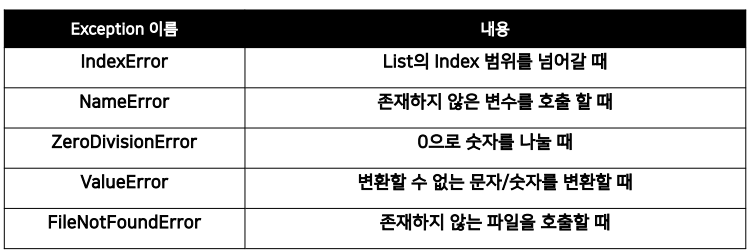

### else구문

In [ ]:
### - try ~ except ~ else 
try:
    예외 발생 가능 코드
except <Exception Type>:
    예외 발생시 동작하는 코드
else:
    예외가 발생하지 않을 때 동작하는 코드

### finally 구문

In [ ]:
- try ~ except ~ finally 
try:
    예외 발생 가능 코드
except <Exception Type>:
    예외 발생시 동작하는 코드
else:
    예외가 발생하지 않을 때 동작하는 코드
finally:
    예외 발생 여부와 상관없이 실행됨

### raise구문

In [ ]:
raise <Exception Type>(예외정보)

In [4]:
while True:
    value = input("변환할 정수 값을 입력해주세요")
    for digit in value:
        if digit not in "0123456789":
            raise ValueError("숫자값을 입력하지않으셨습니다")
        print("정수값으로 변환된 숫자 -", int(value))

변환할 정수 값을 입력해주세요2
정수값으로 변환된 숫자 - 2
변환할 정수 값을 입력해주세요3
정수값으로 변환된 숫자 - 3
변환할 정수 값을 입력해주세요a


ValueError: 숫자값을 입력하지않으셨습니다

### assert구문
- 특정 조건에 만족하지 않을 경우 예외 발생

In [ ]:
assert 예외조건

In [11]:
def get_binary_nmubmer(decimal_number):
    assert isinstance(decimal_number, int)
    return bin(decimal_number)

print(get_binary_nmubmer('zz'))

AssertionError: 

# 2.File Handling

파일의 기본 체계 – 파일 vs 디렉토리

디렉토리 (Directory)
- 폴더 또는 디렉토리로 불림
- 파일과 다른 디렉토리를 포함할 수 있음

파일 (File)
- 컴퓨터에서 정보를 저장하는 논리적인 단위 (wikipedia)
- 파일은 파일명과 확장자로 식별됨 (예: hello.py)
- 실행, 쓰기, 읽기 등을 할 수 있음


- 기본적인 파일 종류로 text 파일과 binary 파일로 나눔
- 컴퓨터는 text 파일을 처리하기 위해 binary 파일로 변환시킴 (예: pyc파일)
- 모든 text 파일도 실제는 binary 파일, ASCII/Unicode 문자열 집합으로 저장되어 사람이 읽을 수 있음

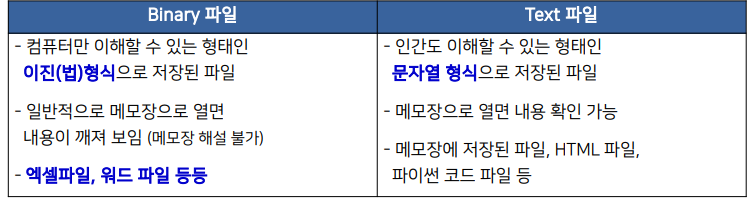

- Python File I/O

f= open("<파일이름>", "접근 모드")
f.close()

In [14]:
f = open("../다시볼부분.txt","r")
f.close()

In [20]:
with open("../다시볼부분.txt","r",encoding='utf-8') as f:
    contents = f.read()
    print(contents)

decorator function
	ai - OOP 강의 



read() - 통쨰로읽어옴

readline() - 너무용량이커서 한번에 못 읽어 온다면 한줄씩 읽어옴

readlines() - 한번에 모든 줄을 읽어서 리스트로 저장

'w', encoding="utf-8" 쓰기모드

'a' 추가모드


In [22]:
f = open("../count_log.txt", 'w', encoding='utf-8')
for i in range(1, 11):
    data = f"{i}번째 줄입니다.\n"
    f.write(data)
f.close()

#### 파일의 존재 유무

In [23]:
import os
os.path.exists("abc") # "abc"라는 팡리이 있는가?

False

####  shutil.copy - 파일복사

In [27]:
import shutil
source = "yesterday.txt"
dest = os.path.join("test","count_log.txt")
shutil.copy(source, dest) # source를 dest에 복사해라

'test\\count_log.txt'

import pathlib - 디렉토리

In [35]:
import pathlib
pathlib.Path.cwd() #현재 디렉토리

WindowsPath('C:/AI_Developer_course_sourcetree/AI_Basic')

In [37]:
print(pathlib.Path.cwd().parent)
print(pathlib.Path.cwd().parent.parent)

C:\AI_Developer_course_sourcetree
C:\


### 로그파일 다루려고 이렇게 만듦. 현재위치/log/count_log.txt

In [39]:
import os
if not os.path.isdir("log"):
    os.mkdir("log")
if not os.path.exists("log/count_log.txt"):
    f = open("log/count_log.txt", 'w', encoding="utf8")
    f.write("기록이 시작됩니다\n")
    f.close()

with open("log/count_log.txt", 'a', encoding="utf8") as f:
    import random, datetime
    for i in range(1, 11):
        stamp = str(datetime.datetime.now())
        value = random.random() * 1000000
        log_line = stamp + "\t" + str(value) +"값이 생성되었습니다" + "\n"
        f.write(log_line)

### Pickle
- 파이썬에 특화된 바이너리 파일이다.
- 데이터, object 등 실행중 정보를 저장하고 불러와서 사용하려고 만든다.

- 파이썬의 객체를 영속화(persistence)하는 built-in 객체
- 저장해야하는 정보, 계산 결과(모델) 등 활용이 많음

바이너리 파일이니까 메모장에서 열어도 글씨 깨져서보인다

In [43]:
# 저장
import pickle

f = open("list.pickle", "wb")
test = [1, 2, 3, 4, 5]
pickle.dump(test, f)
f.close()

In [44]:
# 읽기
f = open("list.pickle", "rb")
test_pickle = pickle.load(f)
print(test_pickle)
f.close()

[1, 2, 3, 4, 5]


In [47]:
del f
f

NameError: name 'f' is not defined

In [49]:
import pickle

class Mutltiply(object):
    def __init__(self, multiplier):
        self.multiplier = multiplier
    def multiply(self, number):
        return number * self.multiplier

muliply = Mutltiply(5)
muliply.multiply(10)

f = open("multiply_object.pickle", "wb")
pickle.dump(muliply, f)
f.close()

In [50]:
f = open("multiply_object.pickle", "rb")
multiply_pickle = pickle.load(f)
multiply_pickle.multiply(5)


25

# 3.Log Handling

## 3-1.로그남기기 - Logging
- 프로그램이 실행되는 동안 일어나는 정보를 기록을 남기기
- 유저의 접근, 프로그램의 Exception, 특정 함수의 사용
- Console 화면에 출력, 파일에 남기기, DB에 남기기 등등
- 기록된 로그를 분석하여 의미있는 결과를 도출 할 수 있음
- 실행시점에서 남겨야 하는 기록, 개발시점에서 남겨야하는 기록

## 3-2. print vs logging
- 기록을 print로 남기는 것도 가능함
- 그러나 Console 창에만 남기는 기록은 분석시 사용불가
- 때로는 레벨별(개발, 운영)로 기록을 남길 필요도 있음
- 모듈별로 별도의 logging을 남길필요도 있음
- 이러한 기능을 체계적으로 지원하는 모듈이 필요함


In [52]:
import logging
logging.debug("틀렸잖아!")
logging.info("확인해")
logging.warning("조심해!")
logging.error("에러났어!!!")
logging.critical ("망했다...")

ERROR:root:에러났어!!!
CRITICAL:root:망했다...


### 3-3.Logging level

In [53]:
import logging
logger = logging.getLogger("main")
stream_hander = logging.StreamHandler()
logger.addHandler(stream_hander)

In [54]:
logger.setLevel(logging.DEBUG)
logger.debug("틀렸잖아!")
logger.info("확인해")
logger.warning("조심해!")
logger.error("에러났어!!!")
logger.critical("망했다...")

틀렸잖아!
DEBUG:main:틀렸잖아!
확인해
INFO:main:확인해
조심해!
에러났어!!!
ERROR:main:에러났어!!!
망했다...
CRITICAL:main:망했다...


In [55]:
logger.setLevel(logging.CRITICAL)
logger.debug("틀렸잖아!")
logger.info("확인해")
logger.warning("조심해!")
logger.error("에러났어!!!")
logger.critical("망했다...")

망했다...
CRITICAL:main:망했다...


## 4. configparser
- 프로그램의 실행 설정을 file에 저장함
- Section, Key, Value 값의 형태로 설정된 설정 파일을 사용
- 설정파일을 Dict Type으로 호출후 사용


## 5. argparser[아규파써]
- Console 창에서 프로그램 실행시 Setting 정보를 저장함
- 거의 모든 Console 기반 Python 프로그램 기본으로 제공
- 특수 모듈도 많이 존재하지만(TF), 일반적으로 argparse를 사용
- Command-Line Option 이라고 부름

In [ ]:
import argparse
parser = argparse.ArgumentParser(description='Sum two integers.')

parser.add_argument('-a', "--a_value", dest=”A_value", help="A integers", type=int)
parser.add_argument('-b', "--b_value", dest=”B_value", help="B integers", type=int)
                    
args = parser.parse_args()
print(args)
print(args.a)
print(args.b)
print(args.a + args.b)

## 6.Loggin 적용하기


- Log의 결과값의 format을 지정해줄 수 있음

In [58]:
formatter = logging.Formatter('%(asctime)s %(levelname)s %(process)d %(message)s')

In [60]:
formatter